In [1]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/7d/76/31fb9c58398f4cbdde4a0831d0407a1ca987fe828c7da9ce80969014a5a1/yfinance-0.2.40-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     - -------------------------------------- 0.1/3.0 MB 2.4 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB 5.1 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 6.1 MB/s eta 0:00:01
     ---------------- ----------------------- 1.2/3.0 MB 6

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

# Bitcoin-USD Exchange Rate Data

In [3]:
# Retrieve two weeks of Bitcoin to USD exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [4]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


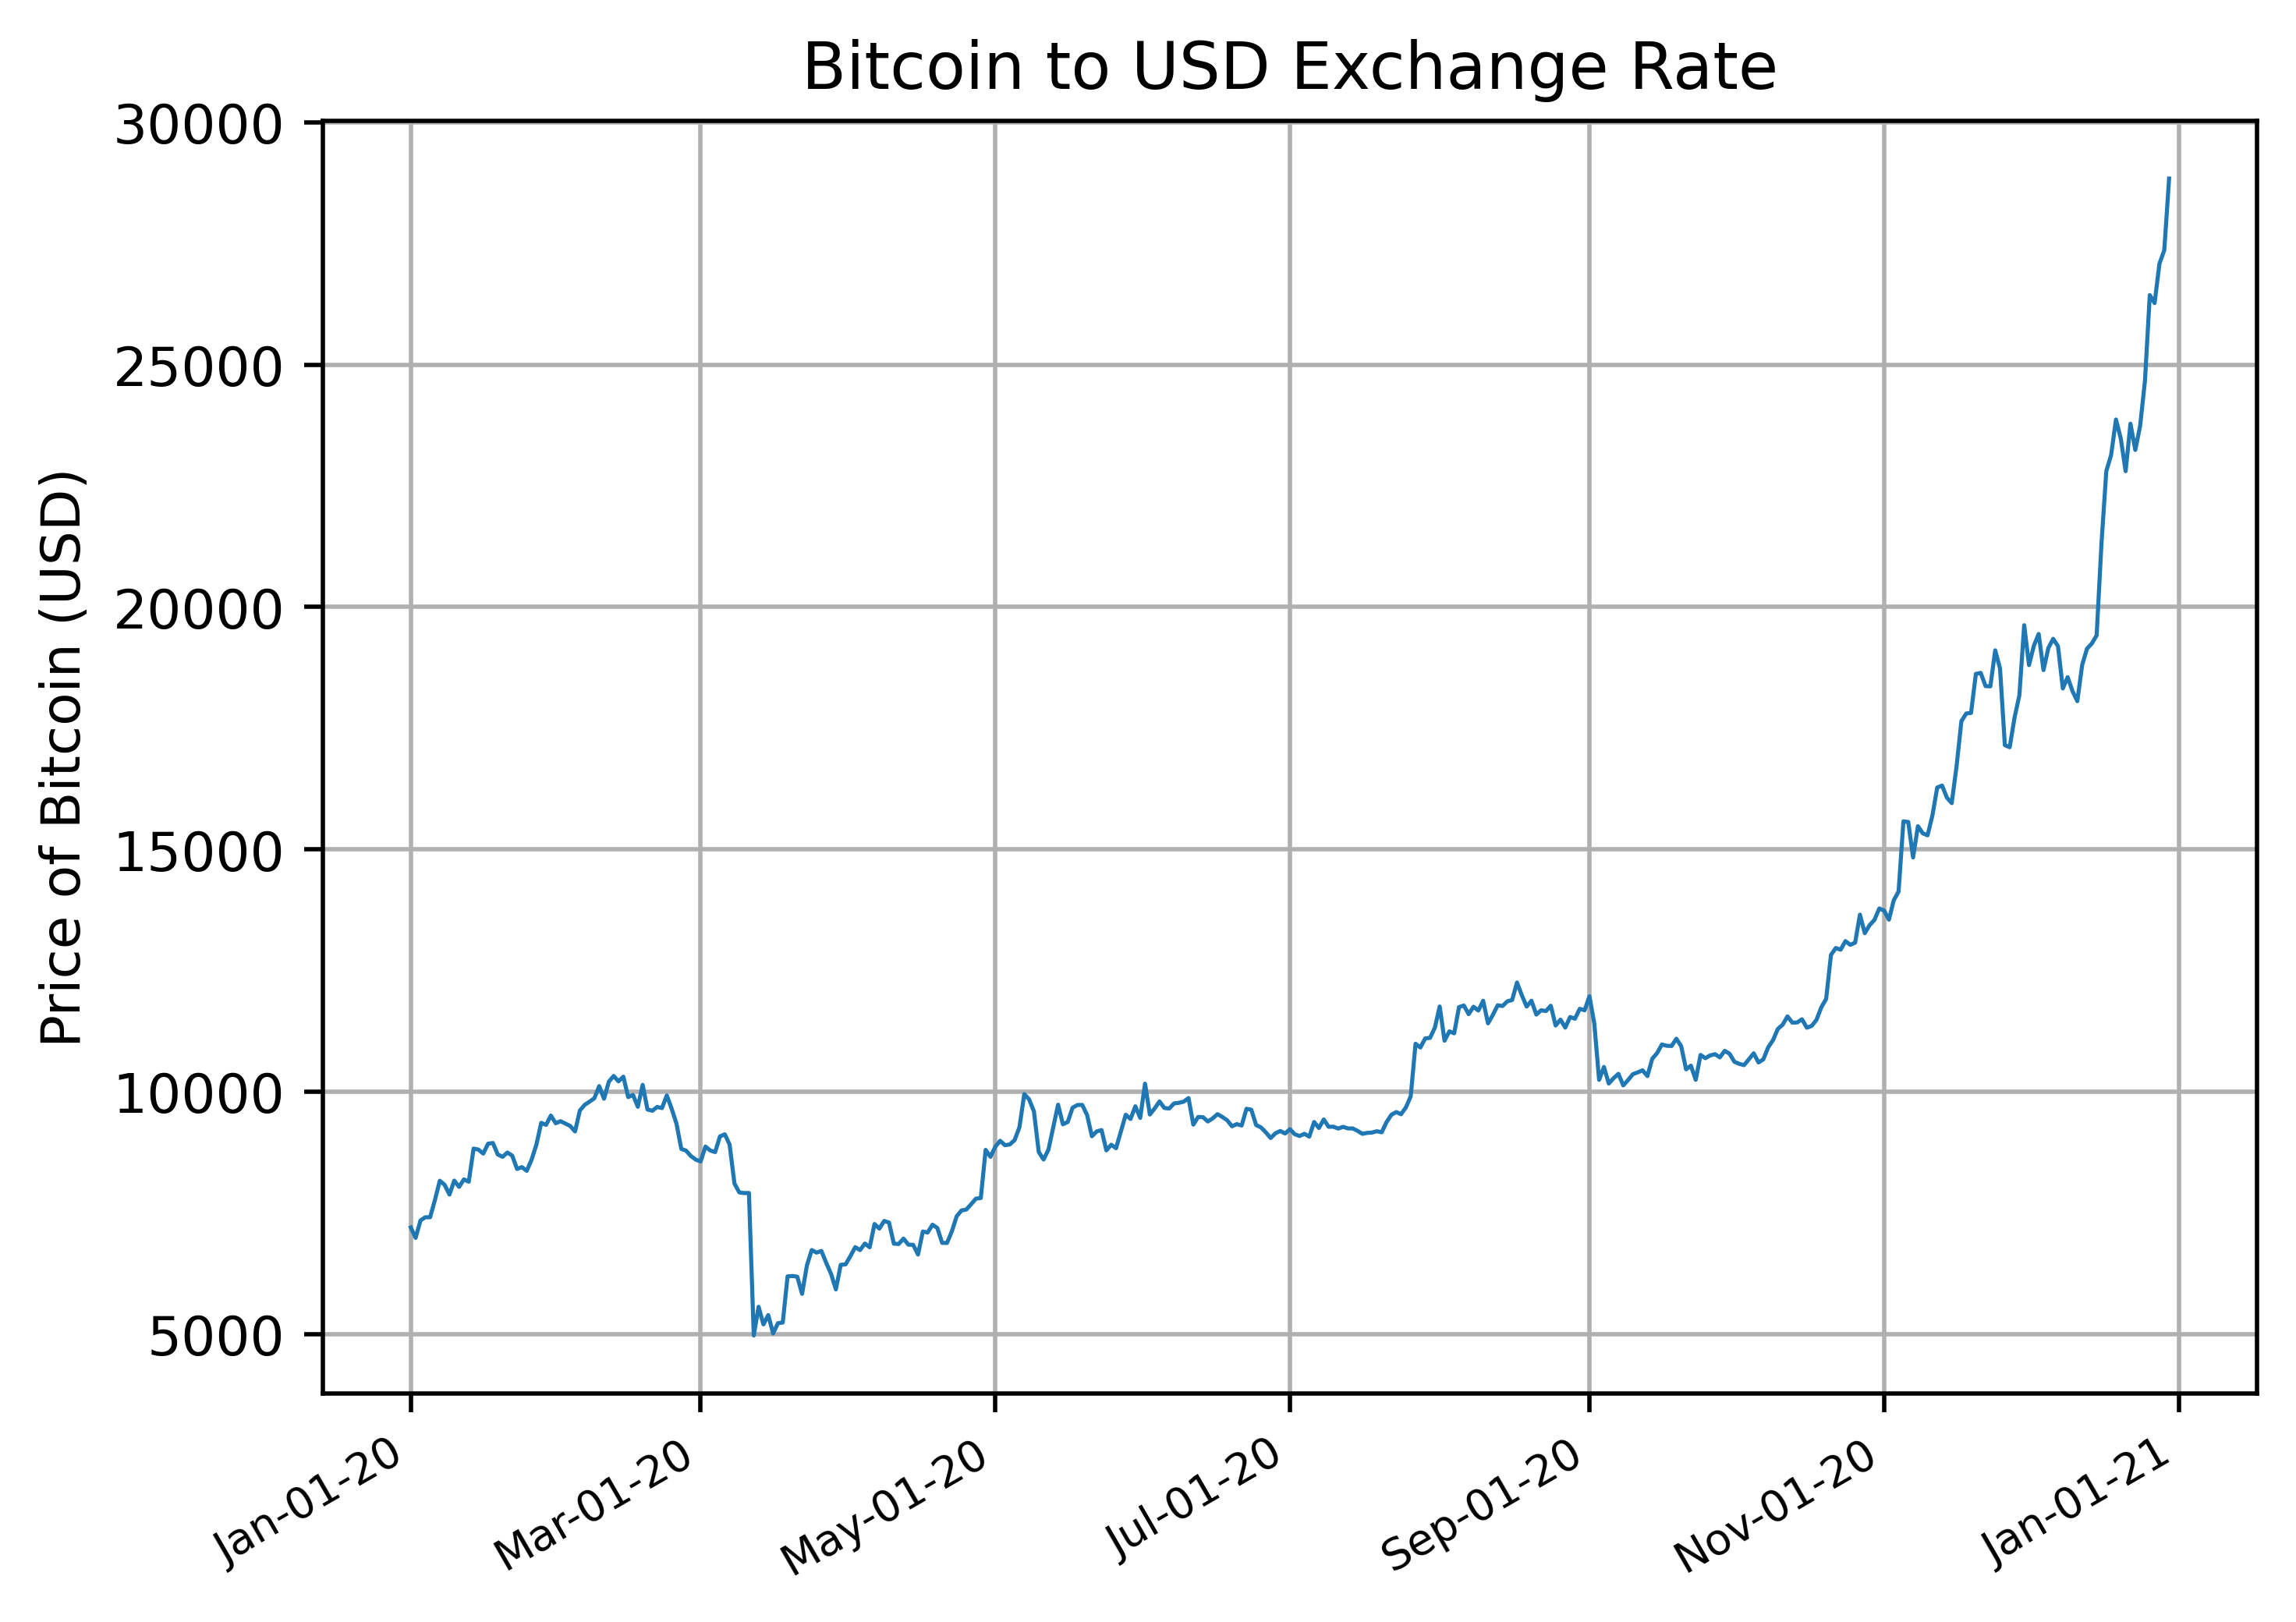

In [5]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

# Compute Simple Moving Averages

In [6]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [7]:
# Add your code below and run the cell
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

In [8]:
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2020-12-26,24677.015625,26718.070312,24522.689453,26437.037109,26437.037109,48332647295,23905.591363,20518.139062
2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605,24253.850694,20823.602148
2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893,24611.070312,21135.848633
2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774,25042.752821,21442.013737
2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704,25713.627387,21749.184310


# Plot the Simple Moving Averages 

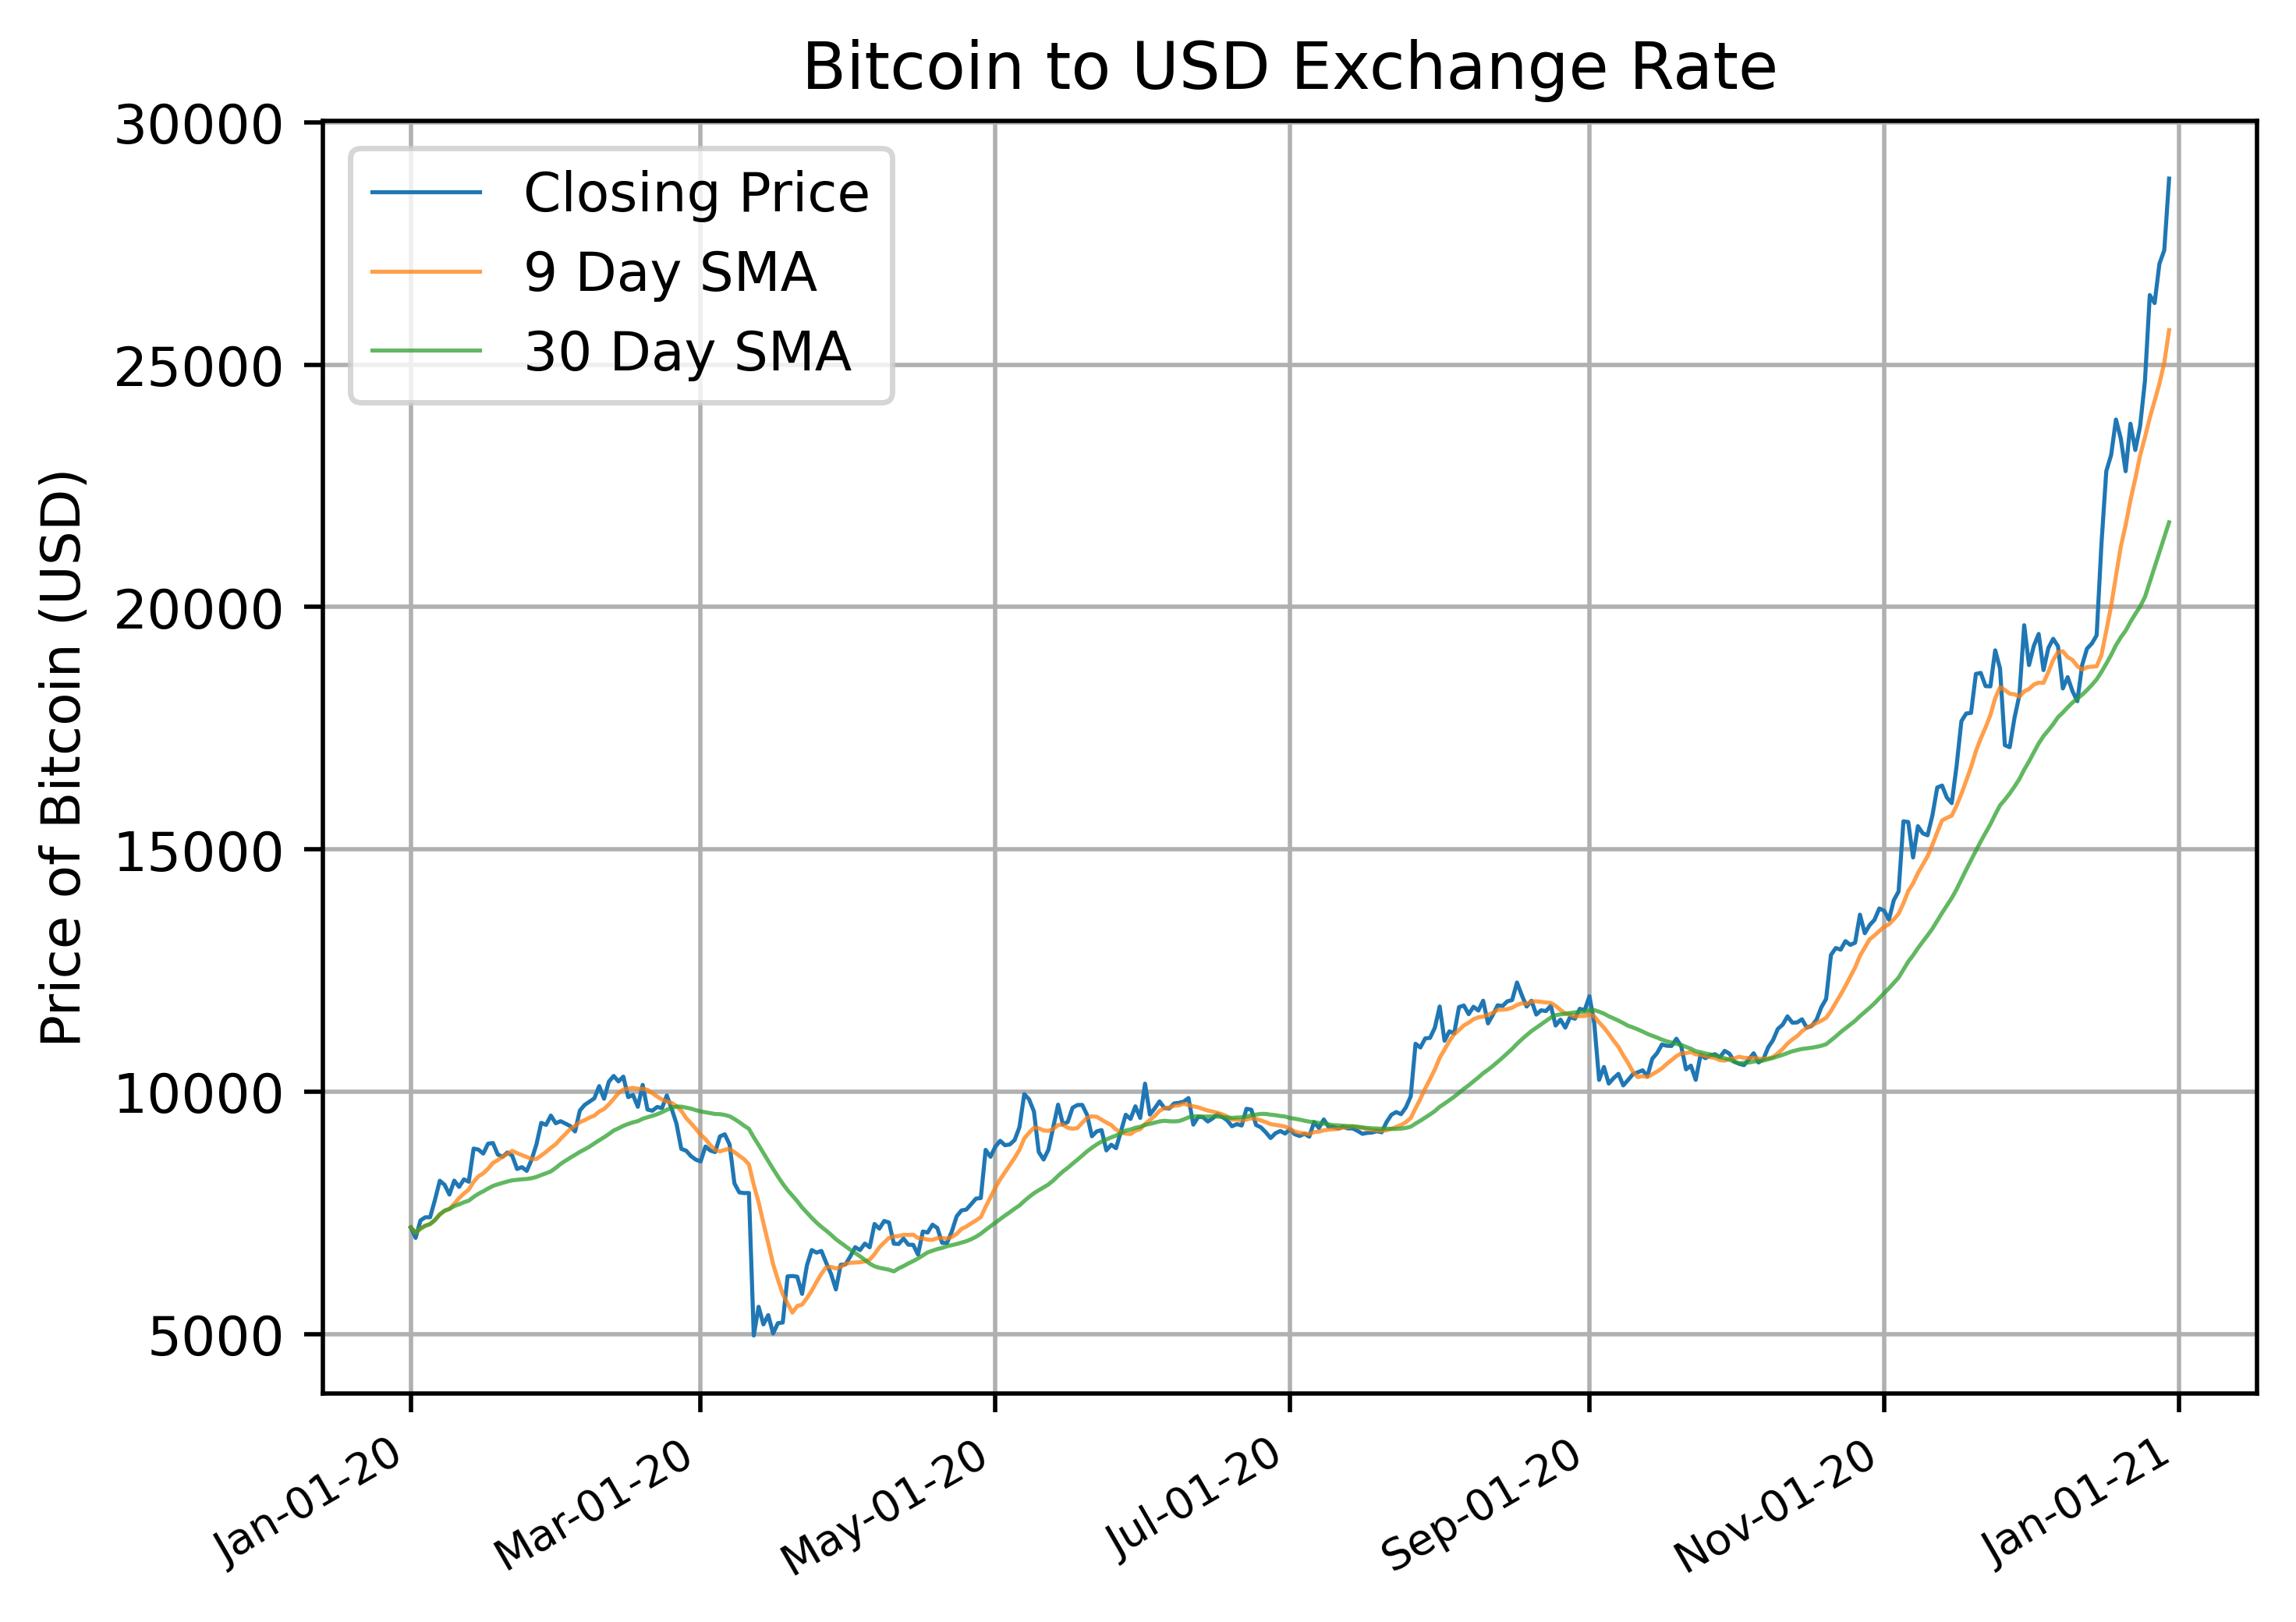

In [9]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

# Moving average crossover Strategy

In [11]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [12]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

In [13]:
trade_signals['Position'] = trade_signals['Signal'].diff()

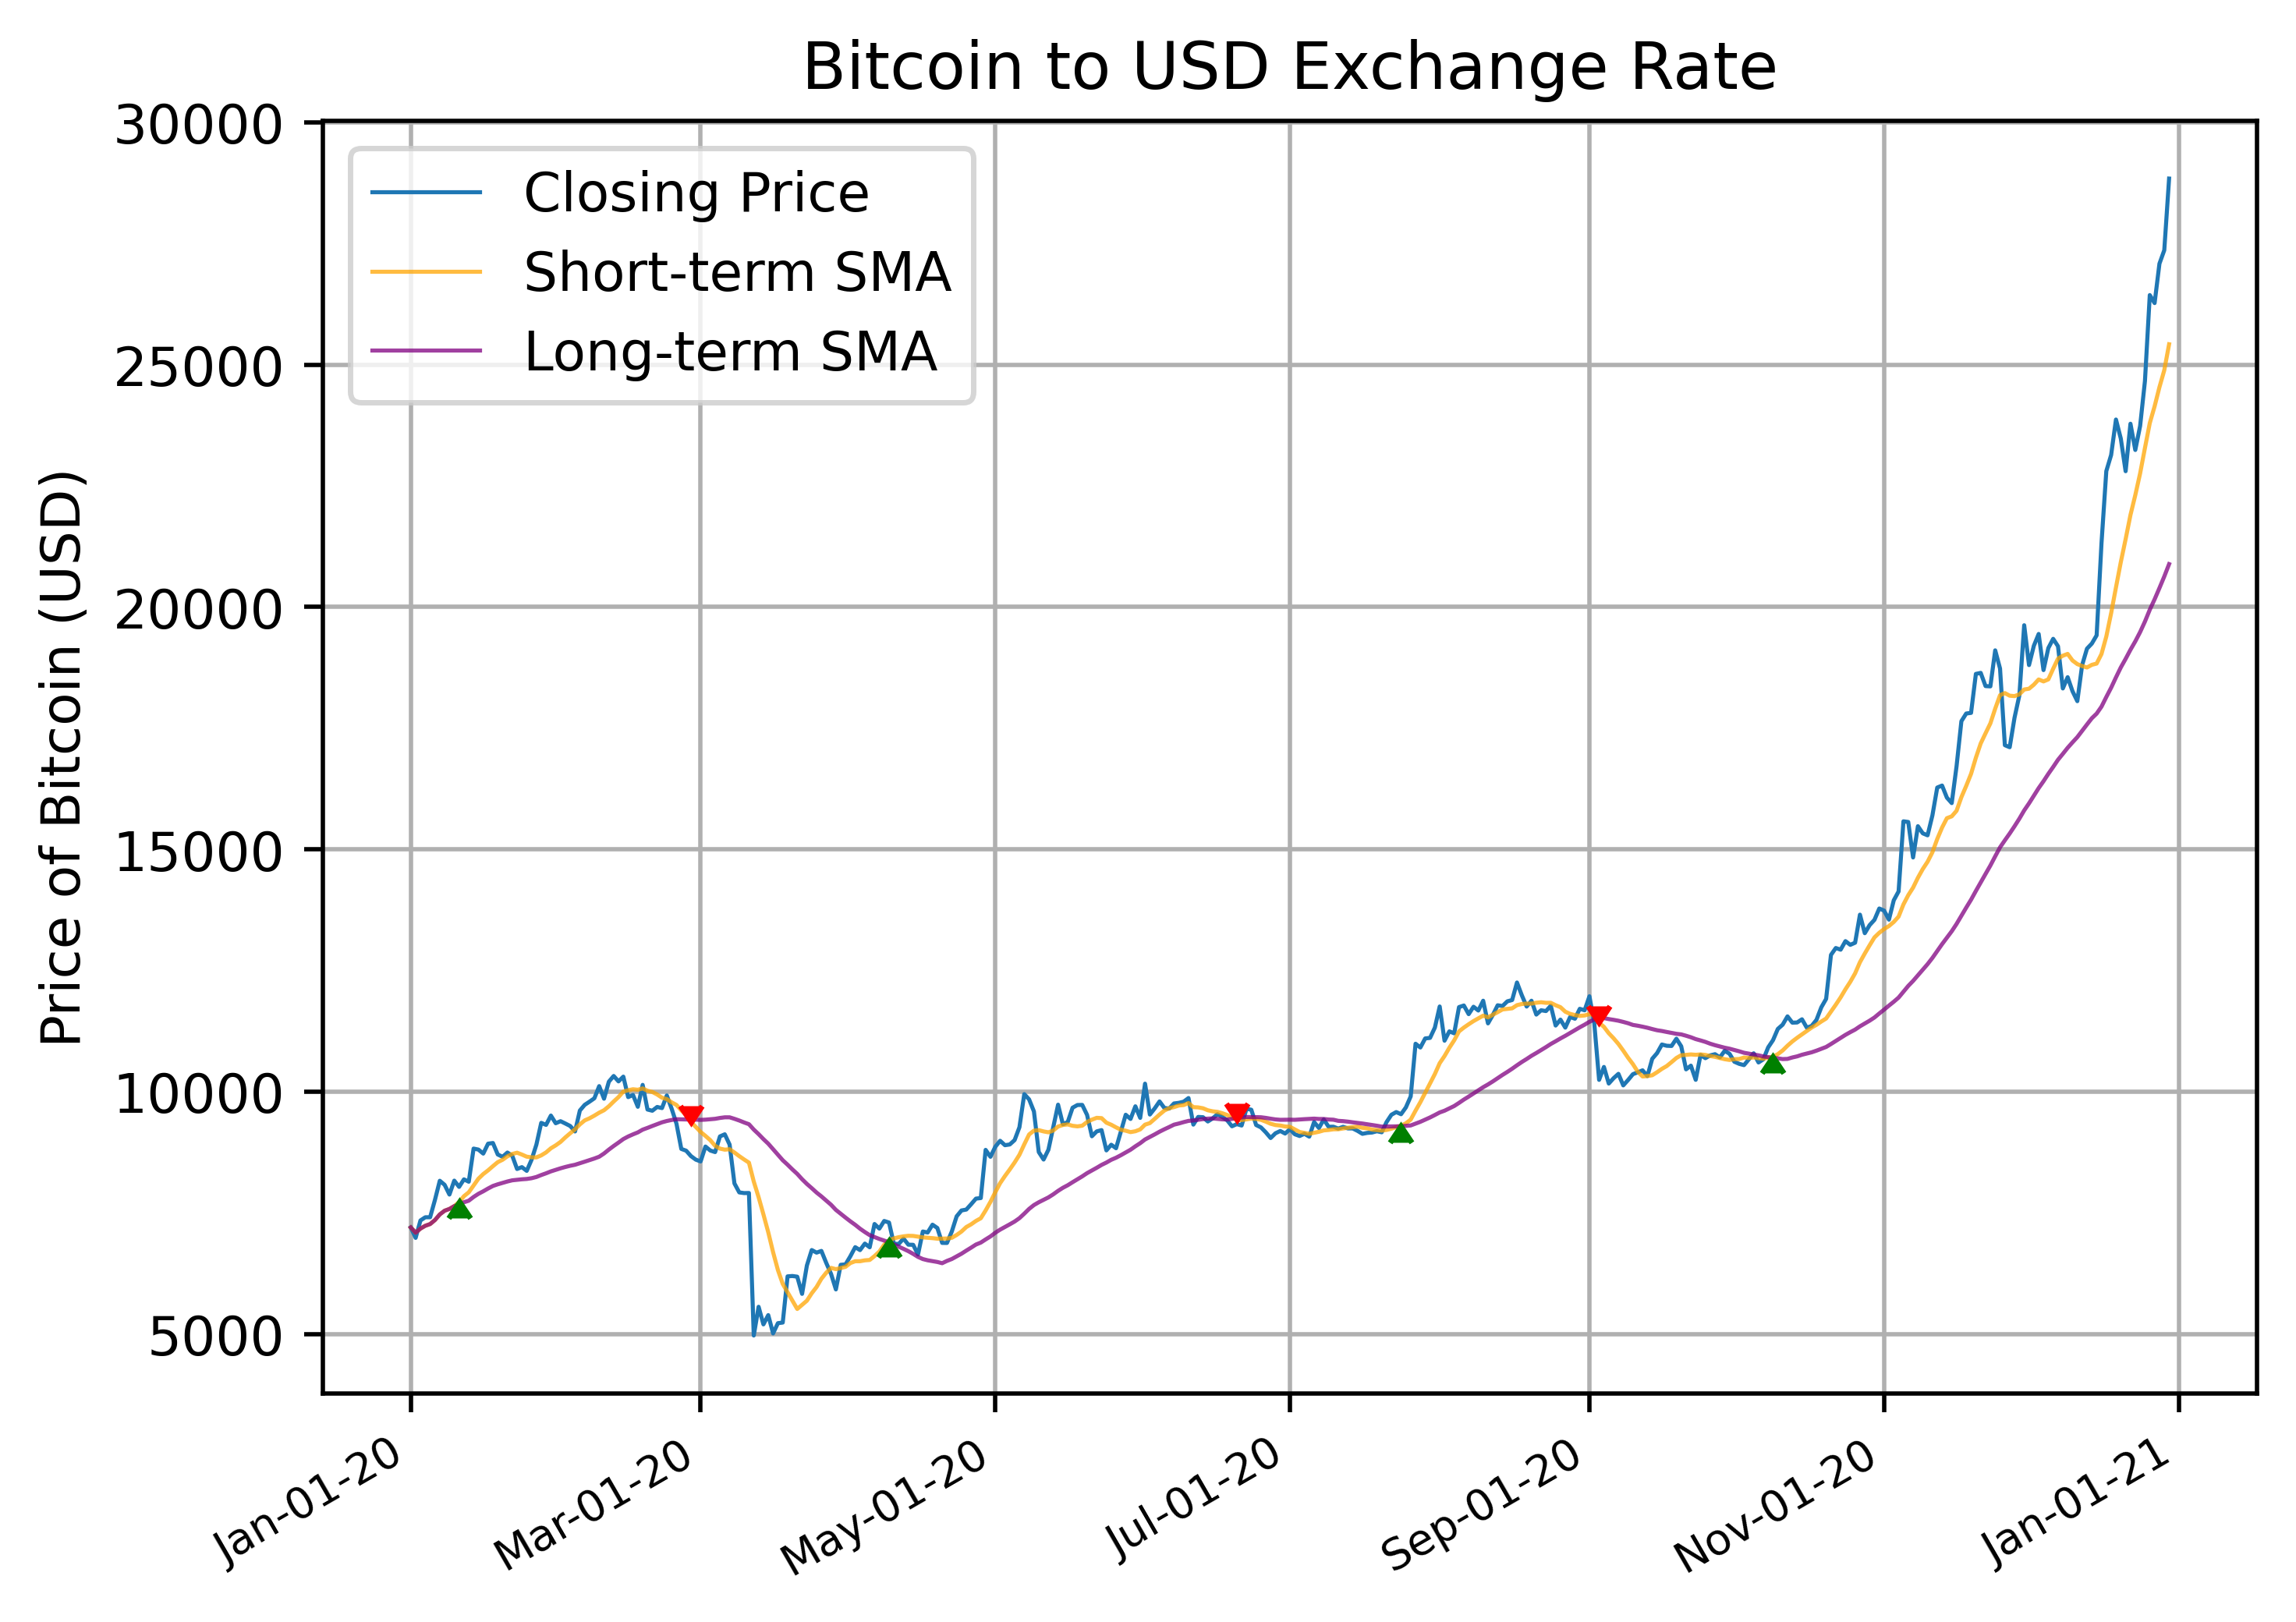

In [14]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()